<a href="https://colab.research.google.com/github/Foco22/Project/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar PySpark y las librerias

In [8]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [9]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.0.1-bin-hadoop2.7"

In [10]:
!pip -q install numpy matplotlib

import findspark
findspark.init()

import os
import numpy as np
import matplotlib.pyplot as plt

from pyspark.sql import Row
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Bank").getOrCreate()

In [67]:
import seaborn as sns

## Carga de Datos (Segmentacion de Clientes)

In [36]:
from google.colab import files
uploaded = files.upload()

Saving Users1.csv to Users1 (1).csv


In [187]:
clients = spark.read.csv('Users1 (1).csv', header=True, sep=';')

In [55]:
clients.show(10)

+-----+----------------+-------------+----------------------+---------------+------+----+--------------------+
|State|      Profession|Profesion Key|Agree terms conditions|Card Mastercard|Source|Edad|         Region Pais|
+-----+----------------+-------------+----------------------+---------------+------+----+--------------------+
|    4|     Horticultor|            1|             VERDADERO|          FALSO|  null|  26|Libertador Genera...|
|    4|      estudiante|            2|             VERDADERO|      VERDADERO|  null|  18|Regi�n Metropolit...|
|    4|   SIN ACTIVIDAD|            3|             VERDADERO|          FALSO|  null|  30|Regi�n Metropolit...|
|    4|      estudiante|            2|             VERDADERO|          FALSO|  null|  25|             Atacama|
|    4|        empleado|            4|             VERDADERO|          FALSO|  null|  57|        La Araucan�a|
|    4|        soldador|            5|             VERDADERO|          FALSO|  null|  29|Regi�n Metropolit...|
|

## Analisis Descriptivo por Variable


In [24]:
from pyspark.sql.functions import isnan, when, count, col

In [44]:
clients.count()

28880

In [188]:
clients.select([count(when(col(c).isNull(), c)).alias(c) for c in 
           clients.columns]).toPandas().T

,0
State,0
Profession,0
Profesion Key,0
Agree terms conditions,0
Card Mastercard,0
Source,27042
Edad,0
Region Pais,0


**La mayoria de los datos de Source son vacios, por lo que, eliminare del analisis esa columna, ya que la gran mayoria de los datos estqan perdidos.



In [57]:
clients.drop("Source") \
.printSchema()

root
 |-- State: string (nullable = true)
 |-- Profession: string (nullable = true)
 |-- Profesion Key: string (nullable = true)
 |-- Agree terms conditions: string (nullable = true)
 |-- Card Mastercard: string (nullable = true)
 |-- Edad: string (nullable = true)
 |-- Region Pais: string (nullable = true)



In [189]:
drop_list = ['Source']

clients = clients.select([column for column in clients.columns if column not in drop_list])

clients.show(10)

+-----+----------------+-------------+----------------------+---------------+----+--------------------+
|State|      Profession|Profesion Key|Agree terms conditions|Card Mastercard|Edad|         Region Pais|
+-----+----------------+-------------+----------------------+---------------+----+--------------------+
|    4|     Horticultor|            1|             VERDADERO|          FALSO|  26|Libertador Genera...|
|    4|      estudiante|            2|             VERDADERO|      VERDADERO|  18|Regi�n Metropolit...|
|    4|   SIN ACTIVIDAD|            3|             VERDADERO|          FALSO|  30|Regi�n Metropolit...|
|    4|      estudiante|            2|             VERDADERO|          FALSO|  25|             Atacama|
|    4|        empleado|            4|             VERDADERO|          FALSO|  57|        La Araucan�a|
|    4|        soldador|            5|             VERDADERO|          FALSO|  29|Regi�n Metropolit...|
|    4|empleado publico|            6|             VERDADERO|   

**State**



Text(0, 0.5, 'Cantidad')

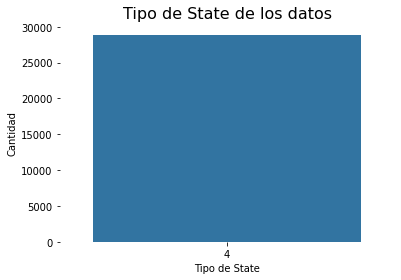

In [70]:
state = clients.groupBy('State').count().orderBy('count').toPandas()
sns.barplot(data = state, x ='State', y ='count')
plt.title('Tipo de State de los datos', fontsize = 16)
sns.despine(left=True, bottom=True)
plt.xlabel('Tipo de State')
plt.ylabel('Cantidad')

In [190]:
drop_list = ['State']

clients = clients.select([column for column in clients.columns if column not in drop_list])

clients.show(10)

+----------------+-------------+----------------------+---------------+----+--------------------+
|      Profession|Profesion Key|Agree terms conditions|Card Mastercard|Edad|         Region Pais|
+----------------+-------------+----------------------+---------------+----+--------------------+
|     Horticultor|            1|             VERDADERO|          FALSO|  26|Libertador Genera...|
|      estudiante|            2|             VERDADERO|      VERDADERO|  18|Regi�n Metropolit...|
|   SIN ACTIVIDAD|            3|             VERDADERO|          FALSO|  30|Regi�n Metropolit...|
|      estudiante|            2|             VERDADERO|          FALSO|  25|             Atacama|
|        empleado|            4|             VERDADERO|          FALSO|  57|        La Araucan�a|
|        soldador|            5|             VERDADERO|          FALSO|  29|Regi�n Metropolit...|
|empleado publico|            6|             VERDADERO|          FALSO|  34|          Valpara�so|
|      almacenera|  

**Profession/Profesion Key**


In [191]:
from pyspark.sql.functions import lower

clients = clients.withColumn('Profession_lower', lower(col('Profession')))
clients.show(10)

+----------------+-------------+----------------------+---------------+----+--------------------+----------------+
|      Profession|Profesion Key|Agree terms conditions|Card Mastercard|Edad|         Region Pais|Profession_lower|
+----------------+-------------+----------------------+---------------+----+--------------------+----------------+
|     Horticultor|            1|             VERDADERO|          FALSO|  26|Libertador Genera...|     horticultor|
|      estudiante|            2|             VERDADERO|      VERDADERO|  18|Regi�n Metropolit...|      estudiante|
|   SIN ACTIVIDAD|            3|             VERDADERO|          FALSO|  30|Regi�n Metropolit...|   sin actividad|
|      estudiante|            2|             VERDADERO|          FALSO|  25|             Atacama|      estudiante|
|        empleado|            4|             VERDADERO|          FALSO|  57|        La Araucan�a|        empleado|
|        soldador|            5|             VERDADERO|          FALSO|  29|Regi

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text major ticklabel objects>)

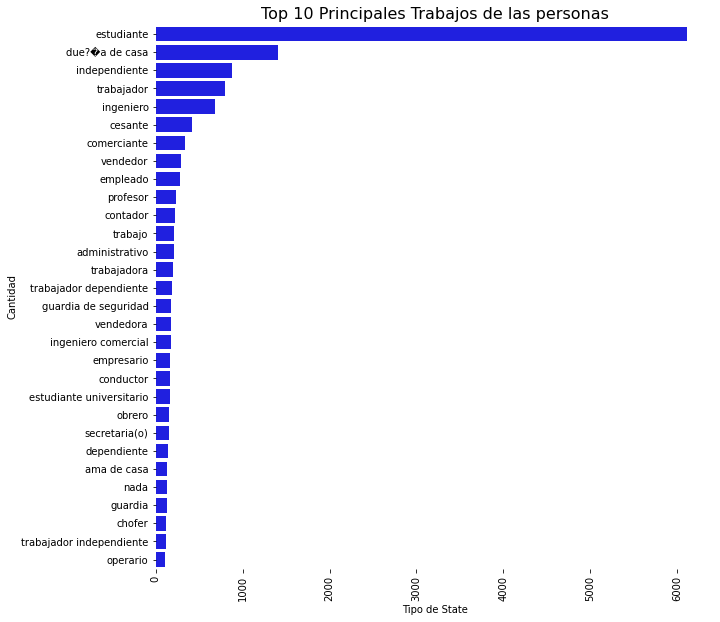

In [92]:
profesional = clients.groupBy('Profession_lower').count().orderBy('count', ascending = False)
profesional = profesional.toPandas().head(30)
plt.figure(figsize = (10,10))
sns.barplot(data = profesional, y ='Profession_lower', x ='count', color = 'b')
plt.title('Top 10 Principales Trabajos de las personas', fontsize = 16)
sns.despine(left=True, bottom=True)
plt.xlabel('Tipo de State')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

Ahora, vamos a ser un analisis de los estudiante, posiblemente hay muchos registros que son estudiantes, pero que no fueron escritos correctamente. Veremos como podemos obtener estos registros


In [193]:
#Grupo 1: Estudiantes
estudiantes = clients.toPandas()
estudiantes = np.unique(list(estudiantes[estudiantes['Profession_lower'].str.match('^estu.*')== True]['Profession_lower']))

#Grupo 2: Asesora del Hogar

dueña_casa = ['due?�a de casa' ,'ama de casa', 'due?�a casa', 'casa','nana de la casa', 'nana','nano','ama dd casa',
             'duena se casa','duesa de casa','due?�o de ogar', 'due?�a de caaa','due?�a de cass','due?�o de casa',
             'ama de casa y trabajadora', 'due?�a de casa cuidando a mi beb?�', 'hogar', 'casa']

#Grupo 3: Desempleo

desempleo  = ['sin actividad', 'sin empleo', 'sin enpleo','sin ocupaci??n',
       'sin ocupacion', 'sin ocupaciones', 'sin oficio', 'sin ofu',
       'sin profecion', 'sin profesion', 'sin trabaj??', 'sin trabajo',
       'sin trabajo actualmente', 'sin trabajo ayuden', 'sin vocacion',
       'desempl', 'desempleada', 'desempleado', 'desempleo',
       'desenpkeado', 'desenpleada', 'desenpleado','cesante']

#Grupo 4: informacion erronea.

sin_informacion = ['sin informaci??n','nada', 'nada','nada de momento', 'nada por el momento', 'nadaa'
                  'no aplica', 'mm piping', '?±i?±os', 'dkdjjffn', 'uy curiosos', 'nnnnnnnnnnnnn' , 'trabajo']

In [194]:
def profesional(x):
   if x in estudiantes:
     return 'Estudiantes'
   elif x in dueña_casa:
      return 'Dueña de Casa'
   elif x in desempleo:
      return 'Desempleo'
   elif x in sin_informacion:
      return 'Sin_informacion'
   else:
      return 'Trabajando'

In [195]:
clients.rdd.map(lambda row: profesional(row['Profession_lower']))

from pyspark.sql.functions import udf
from pyspark.sql.types import *
udfValueToCategory = udf(profesional, StringType())
clients = clients.withColumn("Categoria", udfValueToCategory("Profession_lower"))
clients.show()


+--------------------+-------------+----------------------+---------------+----+--------------------+--------------------+-------------+
|          Profession|Profesion Key|Agree terms conditions|Card Mastercard|Edad|         Region Pais|    Profession_lower|    Categoria|
+--------------------+-------------+----------------------+---------------+----+--------------------+--------------------+-------------+
|         Horticultor|            1|             VERDADERO|          FALSO|  26|Libertador Genera...|         horticultor|   Trabajando|
|          estudiante|            2|             VERDADERO|      VERDADERO|  18|Regi�n Metropolit...|          estudiante|  Estudiantes|
|       SIN ACTIVIDAD|            3|             VERDADERO|          FALSO|  30|Regi�n Metropolit...|       sin actividad|    Desempleo|
|          estudiante|            2|             VERDADERO|          FALSO|  25|             Atacama|          estudiante|  Estudiantes|
|            empleado|            4|     

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

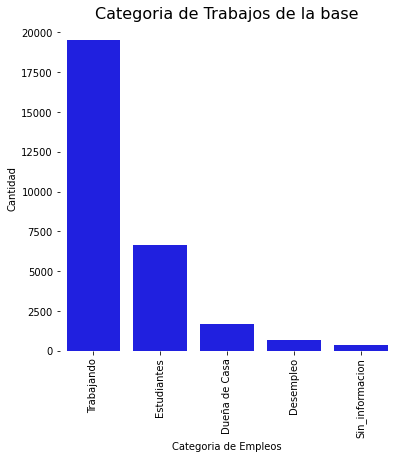

In [141]:
profesional = clients.groupBy('Categoria').count().orderBy('count', ascending = False)
profesional = profesional.toPandas().head(30)
plt.figure(figsize = (6,6))
sns.barplot(data = profesional, x ='Categoria', y ='count', color = 'b')
plt.title('Categoria de Trabajos de la base', fontsize = 16)
sns.despine(left=True, bottom=True)
plt.xlabel('Categoria de Empleos')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

In [196]:
drop_list = ['Profession','Profesion Key', 'Profession_lower']

clients = clients.select([column for column in clients.columns if column not in drop_list])


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

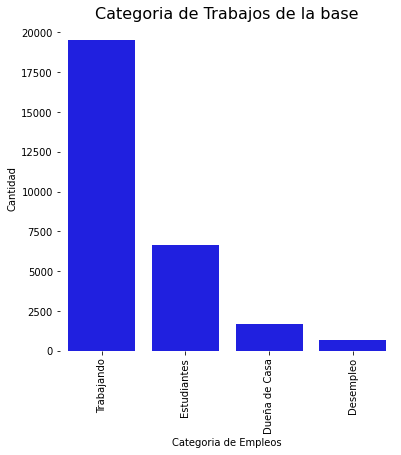

In [197]:
clients = clients.filter("Categoria != 'Sin_informacion' ")

profesional = clients.groupBy('Categoria').count().orderBy('count', ascending = False)
profesional = profesional.toPandas().head(30)
plt.figure(figsize = (6,6))
sns.barplot(data = profesional, x ='Categoria', y ='count', color = 'b')
plt.title('Categoria de Trabajos de la base', fontsize = 16)
sns.despine(left=True, bottom=True)
plt.xlabel('Categoria de Empleos')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

**Agree Terms Conditions**


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text major ticklabel objects>)

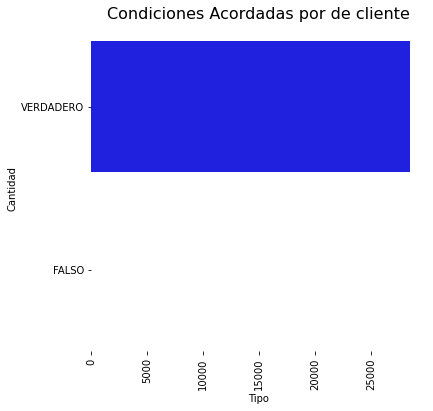

In [154]:
profesional = clients.groupBy('Agree terms conditions').count().orderBy('count', ascending = False)
profesional = profesional.toPandas().head(30)
plt.figure(figsize = (6,6))
sns.barplot(data = profesional, y ='Agree terms conditions', x ='count', color = 'b')
plt.title('Condiciones Acordadas por de cliente', fontsize = 16)
sns.despine(left=True, bottom=True)
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

In [198]:
clients = clients.filter("'Agree terms conditions' != 'FALSO' ")
clients.show(10)

+----------------------+---------------+----+--------------------+-------------+
|Agree terms conditions|Card Mastercard|Edad|         Region Pais|    Categoria|
+----------------------+---------------+----+--------------------+-------------+
|             VERDADERO|          FALSO|  26|Libertador Genera...|   Trabajando|
|             VERDADERO|      VERDADERO|  18|Regi�n Metropolit...|  Estudiantes|
|             VERDADERO|          FALSO|  30|Regi�n Metropolit...|    Desempleo|
|             VERDADERO|          FALSO|  25|             Atacama|  Estudiantes|
|             VERDADERO|          FALSO|  57|        La Araucan�a|   Trabajando|
|             VERDADERO|          FALSO|  29|Regi�n Metropolit...|   Trabajando|
|             VERDADERO|          FALSO|  34|          Valpara�so|   Trabajando|
|             VERDADERO|          FALSO|  60|Regi�n Metropolit...|   Trabajando|
|             VERDADERO|          FALSO|  30|            Tarapac�|   Trabajando|
|             VERDADERO|    

**Card Mastercard**


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

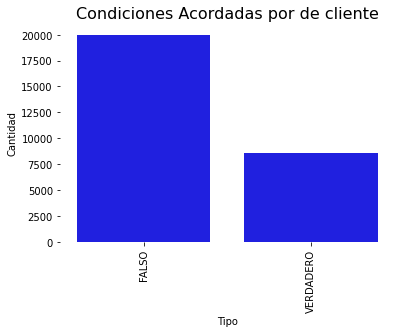

In [164]:
profesional = clients.groupBy('Card Mastercard').count().orderBy('count', ascending = False)
profesional = profesional.toPandas().head(30)
plt.figure(figsize = (6,4))
sns.barplot(data = profesional, x ='Card Mastercard', y ='count', color = 'b')
plt.title('Condiciones Acordadas por de cliente', fontsize = 16)
sns.despine(left=True, bottom=True)
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)

**Edad**


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


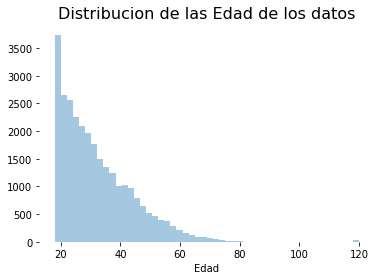

In [199]:
edad = clients.toPandas()
edad['Edad'] = edad['Edad'].apply(lambda x: int(x))
sns.distplot(edad['Edad'], kde = False)
plt.title('Distribucion de las Edad de los datos', fontsize = 16)
sns.despine(left=True, bottom=True)

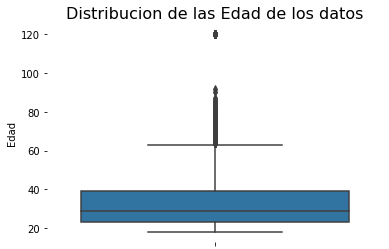

In [175]:
sns.boxplot(data = edad, y ='Edad' )
plt.title('Distribucion de las Edad de los datos', fontsize = 16)
sns.despine(left=True, bottom=True)

In [180]:
edad['Edad'].max()

120

Filtrar los datos, para sacar el dato que tiene 120 años, ya que puede afectar a los analisis posteriores.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


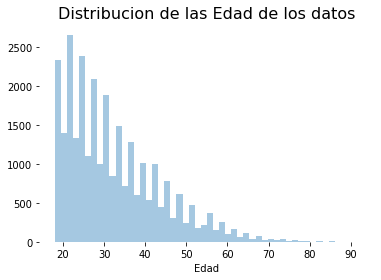

In [200]:
clients = clients.filter(" Edad != '120' ")
edad = clients.toPandas()
edad['Edad'] = edad['Edad'].apply(lambda x: int(x))
sns.distplot(edad['Edad'], kde = False)
plt.title('Distribucion de las Edad de los datos', fontsize = 16)
sns.despine(left=True, bottom=True)